In [9]:
import tensorflow as tf
tf.test.gpu_device_name()

''

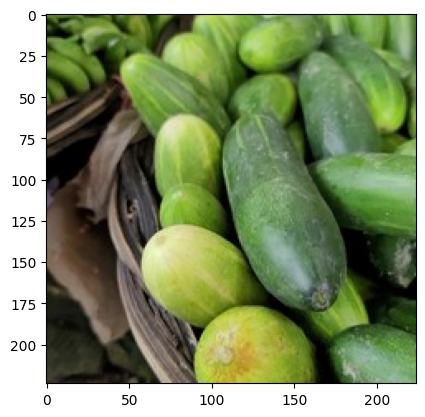

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('C:\\Users\\LG\Documents\\practica_FSI\\Vegetable Images\\test\\Cucumber\\1001.jpg', 'r')

imshow(np.asarray(pil_im))

In [3]:
import tensorflow 
from tensorflow.keras import backend as K
from time import time

# DATA SOURCE --------------------------------------------------

train_data_dir = 'C:\\Users\\LG\Documents\\practica_FSI\\Vegetable Images\\train'
validation_data_dir = 'C:\\Users\\LG\Documents\\practica_FSI\\Vegetable Images\\validation'
test_data_dir = 'C:\\Users\\LG\Documents\\practica_FSI\\Vegetable Images\\test'
image_size = (150, 150)
batch_size = 32

train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
validation_ds = validation_ds.prefetch(buffer_size=32)
test_ds = test_ds.prefetch(buffer_size=32)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras import regularizers


# MODEL --------------------------------------------------

model = Sequential()
model.add(Rescaling(scale=(1./127.5),offset=-1, input_shape=(150, 150, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(15, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 dropout (Dropout)           (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 72, 72, 64)        0         
                                                      

In [5]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [6]:
# TRAINING --------------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping


epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(
          train_ds,
          epochs=epochs,
          validation_data = validation_ds,
          callbacks = [es]
)

Epoch 1/200


469/469 [==============================] - 189s 398ms/step - loss: 2.1885 - accuracy: 0.3897 - val_loss: 1.9953 - val_accuracy: 0.5583
Epoch 2/200
469/469 [==============================] - 2040s 4s/step - loss: 1.2374 - accuracy: 0.6403 - val_loss: 1.4228 - val_accuracy: 0.7463
Epoch 3/200
469/469 [==============================] - 212s 451ms/step - loss: 0.8899 - accuracy: 0.7715 - val_loss: 1.1314 - val_accuracy: 0.8287
Epoch 4/200
469/469 [==============================] - 299s 638ms/step - loss: 0.6907 - accuracy: 0.8419 - val_loss: 0.9652 - val_accuracy: 0.8403
Epoch 5/200
469/469 [==============================] - 275s 584ms/step - loss: 0.5653 - accuracy: 0.8856 - val_loss: 0.8153 - val_accuracy: 0.8980
Epoch 6/200
469/469 [==============================] - 270s 575ms/step - loss: 0.4744 - accuracy: 0.9083 - val_loss: 0.7950 - val_accuracy: 0.8963
Epoch 7/200
469/469 [==============================] - 271s 576ms/step - loss: 0.4626 - accuracy: 0.9127 - val_loss: 0

In [8]:
# SAVING --------------------------------------------------

model.save("my_model.keras")

1/1 [==============================] - 0s 110ms/step
              precision    recall  f1-score   support

           0     0.9949    0.9750    0.9848       200
           1     1.0000    0.9900    0.9950       200
           2     0.9949    0.9750    0.9848       200
           3     0.9512    0.9750    0.9630       200
           4     1.0000    0.9750    0.9873       200
           5     0.9005    0.9950    0.9454       200
           6     0.9802    0.9900    0.9851       200
           7     1.0000    0.9900    0.9950       200
           8     0.9949    0.9700    0.9823       200
           9     0.9747    0.9650    0.9698       200
          10     0.9846    0.9600    0.9722       200
          11     1.0000    1.0000    1.0000       200
          12     0.9900    0.9900    0.9900       200
          13     0.9950    0.9950    0.9950       200
          14     0.9801    0.9850    0.9825       200

    accuracy                         0.9820      3000
   macro avg     0.9827    

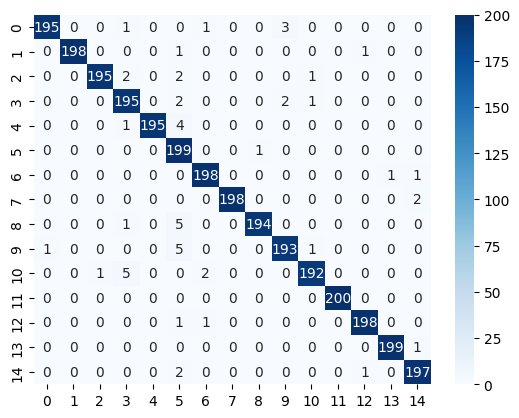

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in validation_ds], axis=1)

labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

#disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
#disp.plot()

print(classification_report(labels, predictions, digits = 4))

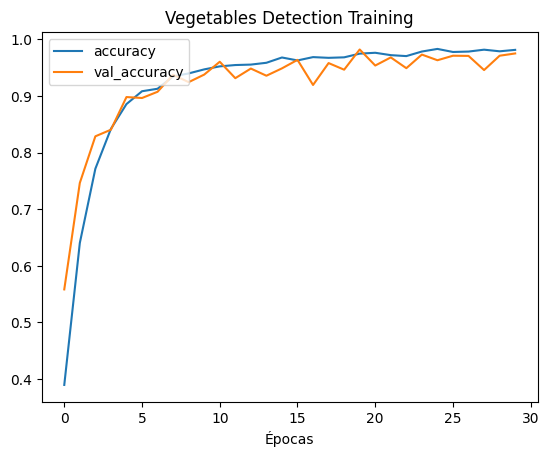

In [10]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Vegetables Detection Training')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

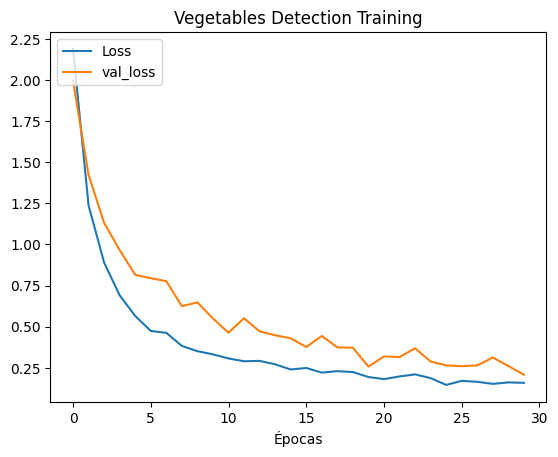

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Vegetables Detection Training')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

(150, 150, 3)
1/1 [==============================] - 0s 74ms/step
El vector de salida obtenido:  [[6.9847605e-03 2.6323393e-03 4.7796717e-04 1.8287593e-02 8.8491716e-04
  3.5774524e-03 1.0873995e-03 2.4273266e-05 4.6565537e-03 9.5611405e-01
  3.4829539e-03 2.0089008e-04 1.3090075e-03 1.2061074e-05 2.6785818e-04]]
1/1 [==============================] - 0s 64ms/step
La etiqueta de salida predicha es  9
1/1 [==============================] - 0s 54ms/step
Ahora dicho con texto: La etiqueta de salida predicha es  cucumber


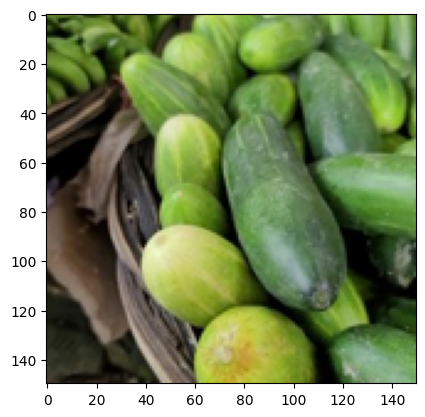

In [13]:
# PRODUCTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import tensorflow.keras

etiquetas=['bean', 'bitter_gourd', 'bottle_gourd','brinjal', 'broccoli', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'cucumber', 
           'papaya', 'potato', 'pumpkin', 'radish', 'tomato']
%matplotlib inline

pil_im = Image.open('C:\\Users\\LG\Documents\\practica_FSI\\Vegetable Images\\test\\Cucumber\\1001.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

im = im.reshape(1,150,150,3)

print('El vector de salida obtenido: ', model.predict(im))
print('La etiqueta de salida predicha es ', np.argmax(model.predict(im)))
print('Ahora dicho con texto: La etiqueta de salida predicha es ', etiquetas[np.argmax(model.predict(im))])

In [14]:
# PRODUCTION ----------------------------------------------

#from matplotlib.pyplot import imshow
import numpy as np
#from PIL import Image
import tensorflow.keras

etiquetas=['bean', 'bitter_gourd', 'bottle_gourd','brinjal', 'broccoli', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'cucumber', 
           'papaya', 'potato', 'pumpkin', 'radish', 'tomato']

%matplotlib inline
print("ETIQUETA PREDICHA -> ETIQUETA REAL")
for minilote in test_ds:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()
    for y_predicha, y_real in zip(np.round(prediccion_minilote,3), etiqueta_real_minilote):
        if np.argmax(y_predicha) == np.argmax(y_real):
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)])
        else:
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)], "✘")

ETIQUETA PREDICHA -> ETIQUETA REAL
1/1 [==============================] - 0s 67ms/step
cucumber -> cucumber
capsicum -> capsicum
papaya -> papaya
cucumber -> cucumber
carrot -> carrot
broccoli -> broccoli
cabbage -> cabbage
tomato -> tomato
bottle_gourd -> bottle_gourd
brinjal -> brinjal
brinjal -> brinjal
cauliflower -> cauliflower
brinjal -> brinjal
capsicum -> capsicum
radish -> radish
bean -> bean
tomato -> tomato
brinjal -> brinjal
radish -> radish
cauliflower -> cauliflower
pumpkin -> pumpkin
bitter_gourd -> bitter_gourd
papaya -> papaya
pumpkin -> pumpkin
pumpkin -> pumpkin
radish -> radish
pumpkin -> pumpkin
bean -> bean
carrot -> carrot
potato -> potato
brinjal -> brinjal
capsicum -> capsicum
1/1 [==============================] - 0s 107ms/step
cauliflower -> cauliflower
bean -> bean
pumpkin -> pumpkin
brinjal -> brinjal
capsicum -> capsicum
radish -> radish
radish -> radish
bottle_gourd -> bottle_gourd
bean -> bean
tomato -> tomato
broccoli -> broccoli
carrot -> carrot
cucumb